In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

path =r'./' # use your path
all_files = glob.glob(path + "/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
df['MonthDayNum'] = df['Date/Time'].dt.day
df['HourOfDay'] = df['Date/Time'].dt.hour
df['MonthOfYear'] = df['Date/Time'].dt.month

In [18]:
df['weekDays'] = df['Date/Time'].dt.weekday_name

In [48]:
df_friday = df[((df['weekDays'] == 'Friday') & (df['HourOfDay'] > 18)) | (df['weekDays'] == 'Saturday')
              & (df['HourOfDay'] < 4)]

df_monday = df[((df['weekDays'] == 'Monday') & ( (df['HourOfDay'] > 8) | (df['HourOfDay'] < 18)))]

In [51]:
import matplotlib  
import matplotlib.pyplot as plt  

def plotNYMap(df): 
    pd.options.display.mpl_style = 'default' #Better Styling  
    new_style = {'grid': False} #Remove grid  
    matplotlib.rc('axes', **new_style)  
    from matplotlib import rcParams  
    rcParams['axes.facecolor'] = 'black' #Size of figure  
    rcParams['figure.figsize'] = (17.5, 17) #Size of figure  
    rcParams['figure.dpi'] = 250
    P=df.plot(kind='scatter', x='Lon', y='Lat',color='black',xlim=(-74.00,-73.95),ylim=(40.70, 40.80),s=.02,alpha=1)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  if __name__ == '__main__':


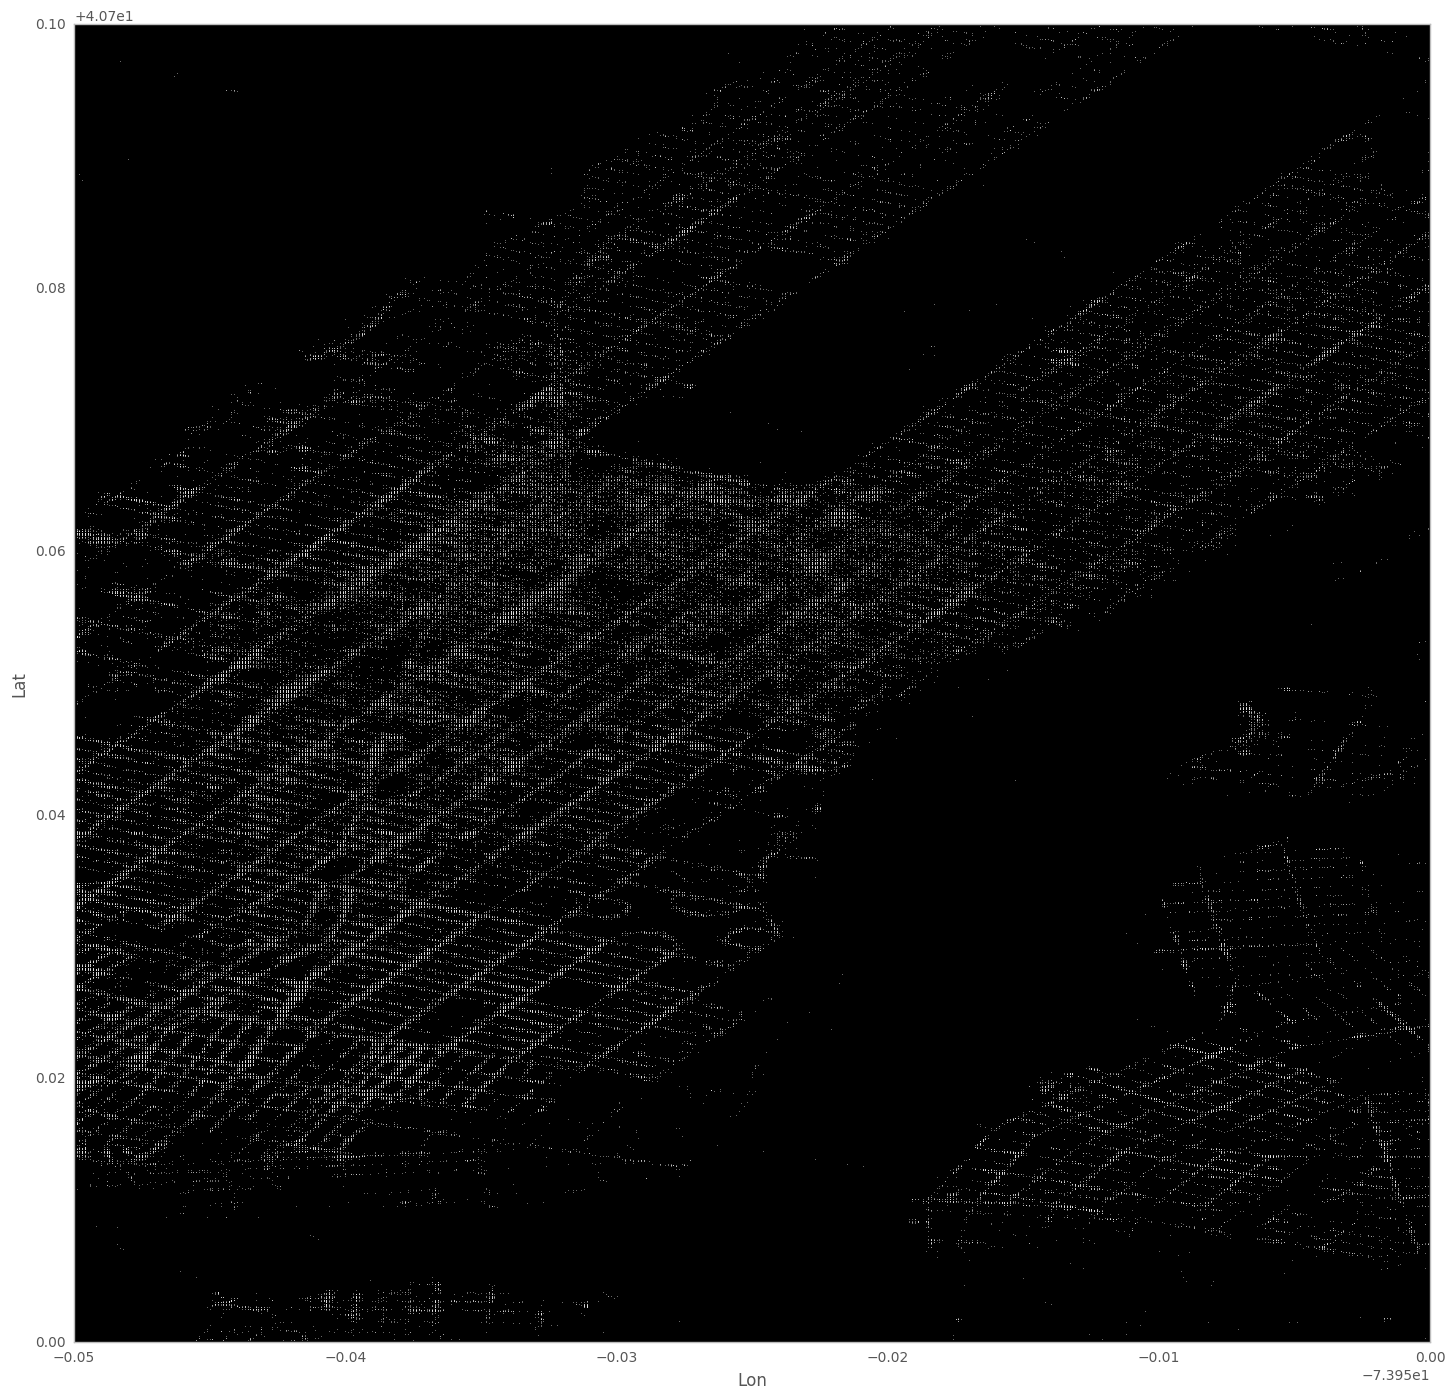

In [54]:
plotNYMap(df_friday)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  if __name__ == '__main__':


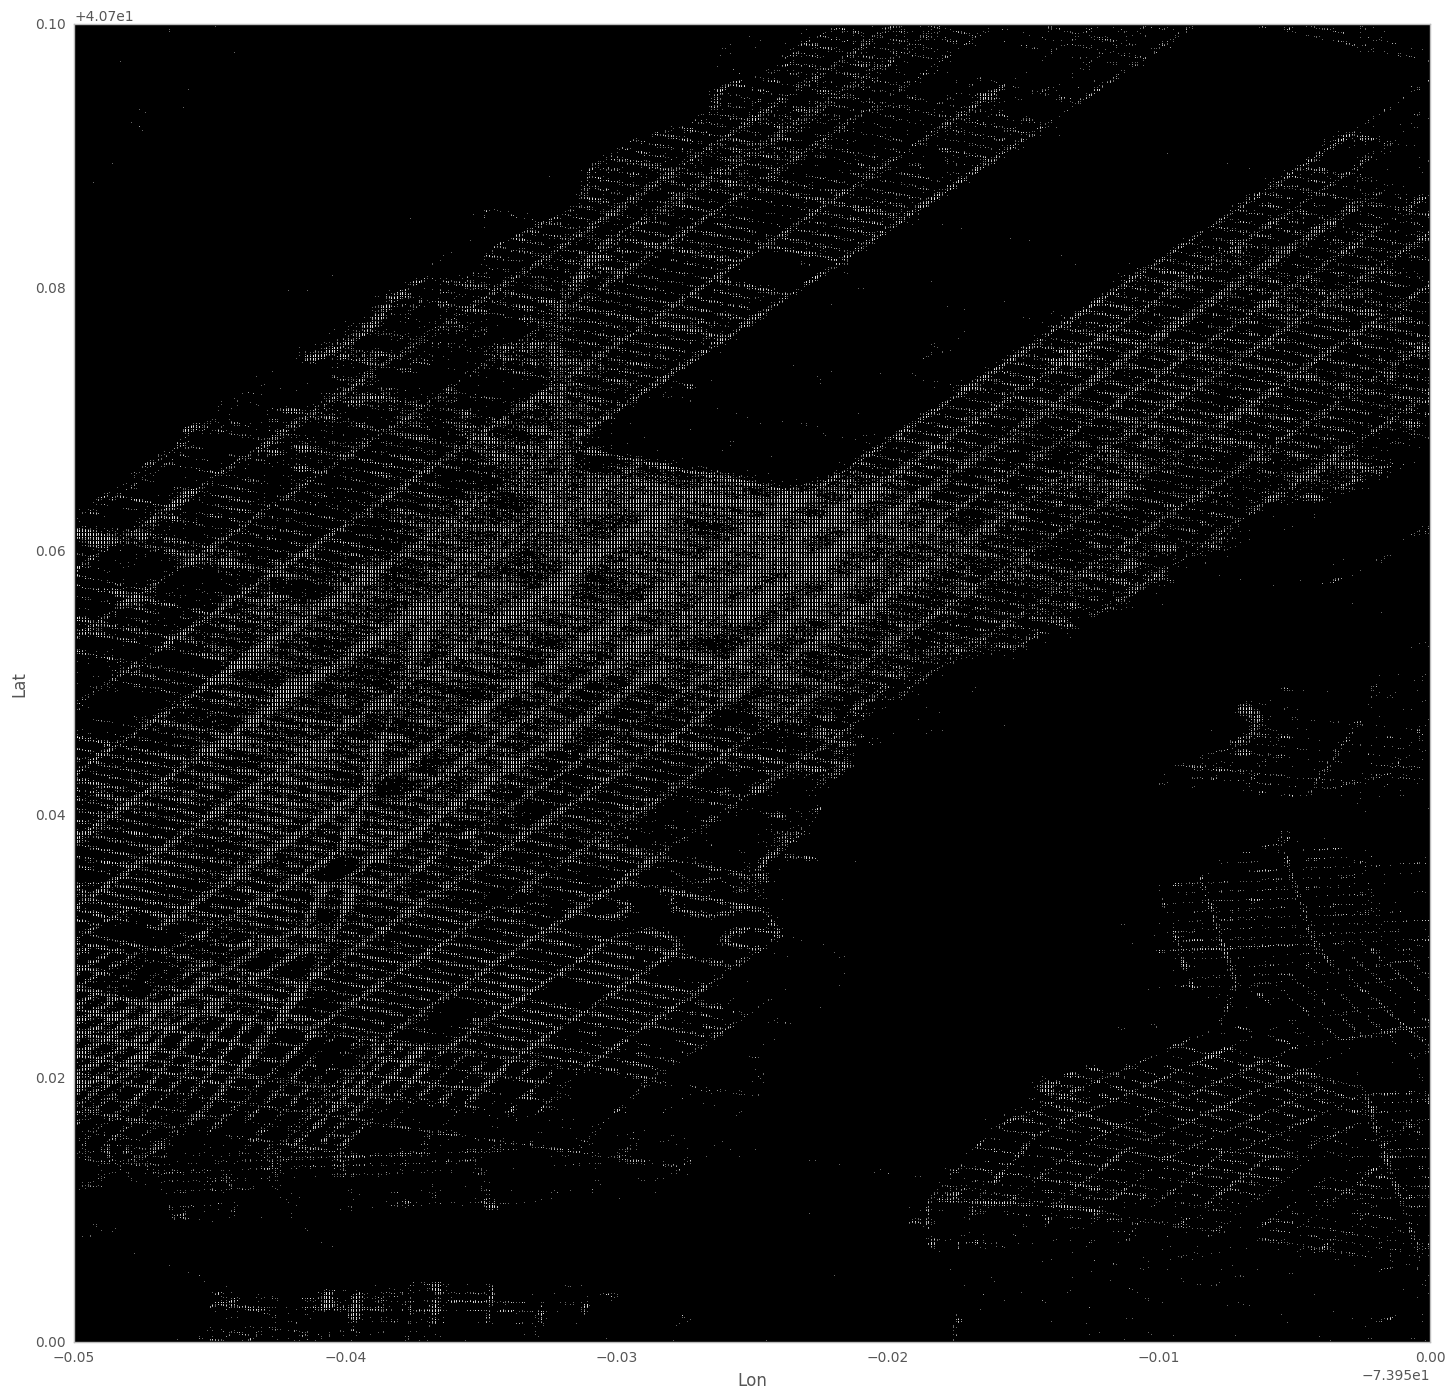

In [53]:
plotNYMap(df_monday)

In [55]:
df_weekdays = df[(df['weekDays'] != 'Saturday') | (df['weekDays'] != 'Sunday')]
df_weekends = df[(df['weekDays'] == 'Saturday') | (df['weekDays'] == 'Sunday')]

In [60]:
len(df_weekdays)/5

906865.4

In [61]:
len(df_weekends)/2

568147.0